In [1]:
%%time
dataset_name = "W19_comb"
df_list = [ "BES_Panel" ]

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

if "id" in BES_Panel.columns:
    BES_Panel = BES_Panel.set_index("id").sort_index()

(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)    
    
# get full set of inferred "cross wave" auth-lib/left-right values and ages
pan_dataset_allr_values = pd.read_csv(BES_small_data_files + "pan_dataset_allr_valuesW19"+".csv")
pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')

Toggle code

var_type (7911, 14)
Wall time: 27.8 s


In [285]:
import holoviews as hv
from holoviews import opts
hv.extension('matplotlib')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [ ]:
surface = hv.Surface(np.flip(Z, 0), bounds=(X.min(), Y.min(), X.max(), Y.max()) )
surface.opts(title=title_text+N_equal_text,
             colorbar=False,
             fig_inches=(8,6),
             xlabel=x_axis_label,
             ylabel=y_axis_label,
             xticks=locator,
             yticks=locator,
#                      invert_yaxis=True,
             zlabel=scale_text,
             fig_rcparams={'axes.titlepad':0},
             fontsize = fs_dict )
hv_dict[like_var +"_by_PC_3D"+wave] = surface 
            
# all_wave_party_list
parties = hv.Dimension(('party','political party'),
                       values=all_wave_party_list+[ 'MAX' ])
waves = hv.Dimension(('wave','BES sample wave'), range=(1,max_wave))

hv.output(backend='matplotlib',fig='svg', holomap='widgets', dpi=80, )
hv.HoloMap({clean_key_int_only(x,"_by_PC_3D"):hv_dict[x] for x in hv_dict.keys() if "3D" in x},
           kdims=["option chosen", waves],)
# 69 MB???? - > 30MB!

In [271]:
samples = 100

pets = ['Cat', 'Dog', 'Hamster', 'Rabbit']
genders = ['Female', 'Male']

pets_sample = np.random.choice(pets, samples)
gender_sample = np.random.choice(genders, samples)

bars = hv.Bars((pets_sample, gender_sample, np.ones(samples)), ['Pets', 'Gender']).aggregate(function=np.sum)

bars.opts(width=500)

:Bars   [Pets,Gender]   (y)

In [275]:
plt.figure(figsize=(12,8));

hue_name = "ptv"+shortname+"W17"
y_label = "%"

df_sns = weighted_count.groupby(value_group).apply(lambda x: 100*x/x.sum()).reset_index()
df_sns.columns = [value_group,hue_name,y_label]

# sns.barplot(data=df_sns,
#             x = value_group,hue=hue_name,y=y_label)

# plt.xticks(range(9),["\n".join(x.split("-")) for x in df_temp[value_group].cat.categories]);
# plt.ylim([0,100]);
# plt.yticks(list(range(0,101,10)));

<Figure size 864x576 with 0 Axes>

In [319]:
df_sns[hue_name].rename("spoon")

0       Likely Voter
1         Don't know
2     Unlikely Voter
3       Likely Voter
4         Don't know
5     Unlikely Voter
6       Likely Voter
7         Don't know
8     Unlikely Voter
9       Likely Voter
10        Don't know
11    Unlikely Voter
12      Likely Voter
13        Don't know
14    Unlikely Voter
15      Likely Voter
16        Don't know
17    Unlikely Voter
18      Likely Voter
19        Don't know
20    Unlikely Voter
21      Likely Voter
22        Don't know
23    Unlikely Voter
24      Likely Voter
25        Don't know
26    Unlikely Voter
Name: spoon, dtype: category
Categories (3, object): [Likely Voter < Don't know < Unlikely Voter]

:Bars   [Surridge Value Group,Prob to Vote Conservative]   (y)
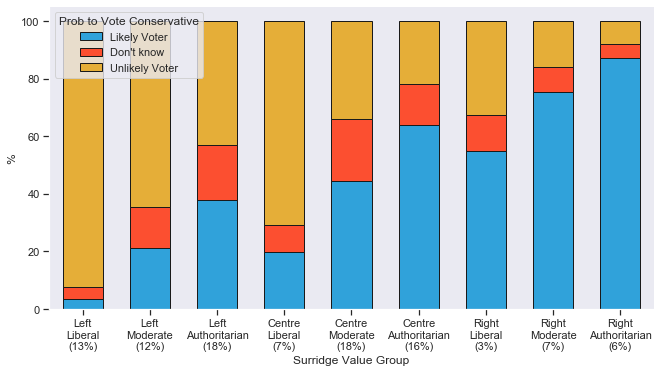

In [326]:
hue_name = "ptv"+shortname+"W17"
new_hue_name = "Prob to Vote Conservative"
hv.Bars((df_sns[value_group].apply(lambda x: "\n".join(x.split("-"))),
         df_sns[hue_name],
         df_sns[y_label]),[value_group,new_hue_name]).opts(fig_size=300,aspect=2,stack_index=1,ylabel="%")

In [311]:
hv.help(hv.Bars)

Bars

Online example: http://holoviews.org/reference/elements/matplotlib/Bars.html

-------------
Style Options
-------------

	align, alpha, c, capsize, color, ec, ecolor, edgecolor, error_kw, facecolor, fc, hatch, log, visible

(Consult matplotlib's documentation for more information.)

------------
Plot Options
------------

The plot options are the parameters of the plotting class:

Parameters of 'BarPlot'

Parameters changed from their default values are marked in red.
Soft bound values are marked in cyan.
C/V= Constant/Variable, RO/RW = ReadOnly/ReadWrite, AN=Allow None

Name                             Value                    Type         Bounds     Mode  

apply_extents                     True                  Boolean        (0, 1)     V RW  
apply_ranges                      True                  Boolean        (0, 1)     V RW  
apply_ticks                       True                  Boolean        (0, 1)     V RW  
aspect                          'square'               Para

In [287]:
# df_sns
hv.Bars((df_sns[value_group], df_sns[hue_name], df_sns[y_label]), ['Pets', 'Gender']).options(
    xlabel = ["\n".join(x.split("-")) for x in df_temp[value_group].cat.categories])


ValueError: String 'xlabel' only takes a string value.

:Bars   [Pets,Gender]   (y)

In [292]:
# hv.help(xlabel)

In [274]:
bars = hv.Bars((pets_sample, gender_sample, np.ones(samples)), ['Pets', 'Gender'])

bars.opts(width=500)

:Bars   [Pets,Gender]   (y)

In [2]:
# https://twitter.com/p_surridge/status/1262001036031668224

In [106]:
search(BES_Panel,"wt_new.*(W17|W19)|pastvote_ge_2019W19|ptv.*W17|(al|lr)_scaleW17")

wt_new_W17             34366
wt_new_W13W17          15744
wt_new_W6W13W19         8743
wt_new_W9W19           13604
wt_new_W13_W19          5861
wt_new_W13W19          15811
wt_new_W16W19          21840
wt_new_W17W18W19       19000
wt_new_W19_result      32177
wt_newW17W19           23315
ptvConW17              34366
ptvLabW17              34366
ptvLDW17               34366
ptvSNPW17               3388
ptvPCW17                2084
ptvUKIPW17             34366
ptvBrexitPartyW17      34366
ptvGrnW17              34366
pastvote_ge_2019W19    28284
lr_scaleW17            30488
al_scaleW17            29773
dtype: int64

In [108]:
BES_Panel["pastvote_ge_2019W19"].value_counts()

Conservative                     12666
Labour                            8244
Liberal Democrat                  3579
Scottish National Party (SNP)     1249
Green                              858
Brexit Party                       722
Other                              553
Don't know                         231
Plaid Cymru                        182
Name: pastvote_ge_2019W19, dtype: int64

In [155]:
ptv_replace_dict = {'Very unlikely':"Unlikely Voter",
 '1':"Unlikely Voter",
 '2':"Unlikely Voter",
 '3':"Unlikely Voter",
 '4':"Unlikely Voter",
 '5':"Don't know",
 '6':"Likely Voter",
 '7':"Likely Voter",
 '8':"Likely Voter",
 '9':"Likely Voter",
 'Very likely':"Likely Voter",
 "Don't know":"Don't know"}

In [208]:
lv_cat_order = ["Likely Voter","Don't know","Unlikely Voter"]

likely_voters = BES_Panel[search(BES_Panel,"ptv.*W17").index].replace(ptv_replace_dict).astype('category')\
    .apply(lambda x: x.cat.reorder_categories(lv_cat_order,ordered=True))

In [185]:
# likely_voters_temp = BES_Panel[search(BES_Panel,"ptv.*W17").index].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))
# likely_voters = likely_voters_temp>=6
# likely_voters[likely_voters_temp.isnull()]=np.nan
# likely_voters.notnull().sum()

In [63]:
def weighted_mean(x, **kws):
    val, weight = map(np.asarray, zip(*x))
    non_null = (~np.isnan(val))&(~np.isnan(weight))
    val, weight = val[non_null],weight[non_null]
#     raise Exception
    return (val * weight).sum() / weight.sum()

In [130]:
def surridge_lr_scale(x,centre_cutoff,right_cutoff):
    if pd.isnull(x):
        return np.nan
    
    if x<centre_cutoff:
        return "Left"
    elif x<right_cutoff:
        return "Centre"
    else:
        return "Right"
    
def surridge_al_scale(x,centre_cutoff,right_cutoff):
    if pd.isnull(x):
        return np.nan
    
    if x<centre_cutoff:
        return "Liberal"
    elif x<right_cutoff:
        return "Moderate"
    else:
        return "Authoritarian"

al_lr_scale = BES_Panel[["lr_scaleW17","al_scaleW17"]].apply(lambda x: x.cat.codes).replace(-1,np.nan)    
al_lr_scale["lr_scaleW17"] = al_lr_scale["lr_scaleW17"].apply(lambda x: surridge_lr_scale(x, 6,11 ) )
al_lr_scale["al_scaleW17"] = al_lr_scale["al_scaleW17"].apply(lambda x: surridge_al_scale(x, 10,15 ) )



cats = (al_lr_scale["lr_scaleW17"]+"-"+al_lr_scale["al_scaleW17"]).astype('category')

cats = cats.cat.reorder_categories([ 'Left-Liberal', 'Left-Moderate','Left-Authoritarian',
    'Centre-Liberal', 'Centre-Moderate','Centre-Authoritarian',
        'Right-Liberal', 'Right-Moderate','Right-Authoritarian',],ordered=True)


wts = BES_Panel["wt_new_W17"]
mask = cats.notnull() & wts.notnull()
wvc = weighted_value_counts(cats[mask],wts[mask],normalize=True, perc=True,decimal_places=0).sort_index()["weighted_sample_percentage"]


cats = cats.cat.rename_categories([x+"-("+str(wvc[x])+"%)" for x in cats.cat.categories])

In [9]:
value_range = BES_Panel[["lr_scaleW17","al_scaleW17"]].apply(lambda x: x.cat.codes).replace(-1,np.nan)["lr_scaleW17"].value_counts().sort_index().index
sur_df = pd.concat([pd.DataFrame.from_dict({k:surridge_lr_scale(k, 6,11 ) for k in value_range},orient='index'),
           pd.DataFrame.from_dict({k:surridge_al_scale(k, 10,15 ) for k in value_range},orient='index')],axis=1)
sur_df.columns = ["left-right","lib-auth"]
sur_df

,left-right,lib-auth
0.0,Left,Liberal
1.0,Left,Liberal
2.0,Left,Liberal
3.0,Left,Liberal
4.0,Left,Liberal
5.0,Left,Liberal
6.0,Centre,Liberal
7.0,Centre,Liberal
8.0,Centre,Liberal
9.0,Centre,Liberal


In [209]:
df = pd.DataFrame()
value_group = "Surridge Value Group"
df[value_group] = cats
df["vote_wts"] = BES_Panel["wt_newW17W19"]
# df["wts"] = BES_Panel["wt_new_W19_result"]
df["likely_wts"] = BES_Panel["wt_new_W17"]
#wt_new_W19_result 
vote_name = "2019GEVote"

df[vote_name] = BES_Panel["pastvote_ge_2019W19"]
df[likely_voters.columns] = likely_voters

In [210]:
longname = "Conservative"
shortname = "Con"
var_list = [value_group,"vote_wts","likely_wts",vote_name,"ptv"+shortname+"W17"]

vote_mask = df[vote_name].notnull() & df["vote_wts"].notnull()
likely_mask = df["ptv"+shortname+"W17"].notnull() & df["likely_wts"].notnull()

df_temp = df[var_list].copy()

df_temp[vote_name] = df_temp[vote_name]==longname
df_temp.loc[df[vote_name].isnull(),vote_name]=np.nan
df_temp[vote_name+"_wts"] = list(zip(df_temp[vote_name].astype('float32')*100,df_temp["vote_wts"]))


df_temp["likely"+shortname] = df_temp["ptv"+shortname+"W17"]=="Likely Voter"
df_temp.loc[df["ptv"+shortname+"W17"].isnull(),"likely"+shortname]=np.nan
df_temp["likely"+shortname+"_wts"] = list(zip(df_temp["likely"+shortname].astype('float32')*100,df_temp["likely_wts"]))

# df_temp.dropna().groupby([value_group,"ptv"+shortname+"W17"])[vote_name+"_wts"].apply(lambda x: weighted_mean(x)).round(2)
# df_temp.dropna().groupby([value_group],[df["ptv"+shortname+"W17"])[vote_name+"_wts"].apply(lambda x: weighted_mean(x)).round(2)

In [211]:
df_temp["ptvConW17"]

id
1                   NaN
2          Likely Voter
3                   NaN
4                   NaN
5                   NaN
              ...      
98447      Likely Voter
98448        Don't know
98449    Unlikely Voter
98450    Unlikely Voter
98451        Don't know
Name: ptvConW17, Length: 97158, dtype: category
Categories (3, object): [Likely Voter < Don't know < Unlikely Voter]

In [212]:
df_temp.groupby([value_group,"ptv"+shortname+"W17"])[vote_name+"_wts"].apply(lambda x: weighted_mean(x)).round(2)

Surridge Value Group        ptvConW17     
Left-Liberal-(13%)          Likely Voter      49.03
                            Don't know        12.57
                            Unlikely Voter     0.45
Left-Moderate-(12%)         Likely Voter      72.17
                            Don't know        26.75
                            Unlikely Voter     4.63
Left-Authoritarian-(18%)    Likely Voter      83.82
                            Don't know        44.45
                            Unlikely Voter    11.96
Centre-Liberal-(7%)         Likely Voter      63.70
                            Don't know        15.20
                            Unlikely Voter     1.50
Centre-Moderate-(18%)       Likely Voter      80.55
                            Don't know        32.92
                            Unlikely Voter    10.66
Centre-Authoritarian-(16%)  Likely Voter      89.73
                            Don't know        52.28
                            Unlikely Voter    17.21
Right-Liberal-(3%)   

In [213]:
df_temp.groupby([value_group,"ptv"+shortname+"W17"])[vote_name+"_wts"].count()

Surridge Value Group        ptvConW17     
Left-Liberal-(13%)          Likely Voter       141
                            Don't know         121
                            Unlikely Voter    3581
Left-Moderate-(12%)         Likely Voter       730
                            Don't know         390
                            Unlikely Voter    2308
Left-Authoritarian-(18%)    Likely Voter      2022
                            Don't know         780
                            Unlikely Voter    2086
Centre-Liberal-(7%)         Likely Voter       384
                            Don't know         174
                            Unlikely Voter    1501
Centre-Moderate-(18%)       Likely Voter      2380
                            Don't know         861
                            Unlikely Voter    1764
Centre-Authoritarian-(16%)  Likely Voter      3078
                            Don't know         548
                            Unlikely Voter     839
Right-Liberal-(3%)          Likely Vote

In [214]:
weighted_count = df_temp.groupby([value_group,"ptv"+shortname+"W17"])["vote_wts"].sum()
weighted_count

Surridge Value Group        ptvConW17     
Left-Liberal-(13%)          Likely Voter        88.221046
                            Don't know         101.421707
                            Unlikely Voter    2283.177734
Left-Moderate-(12%)         Likely Voter       466.421295
                            Don't know         314.380920
                            Unlikely Voter    1413.076416
Left-Authoritarian-(18%)    Likely Voter      1309.763306
                            Don't know         649.789795
                            Unlikely Voter    1488.098267
Centre-Liberal-(7%)         Likely Voter       236.647400
                            Don't know         113.582588
                            Unlikely Voter     852.754761
Centre-Moderate-(18%)       Likely Voter      1505.535156
                            Don't know         726.699158
                            Unlikely Voter    1159.299194
Centre-Authoritarian-(16%)  Likely Voter      1875.806030
                            D

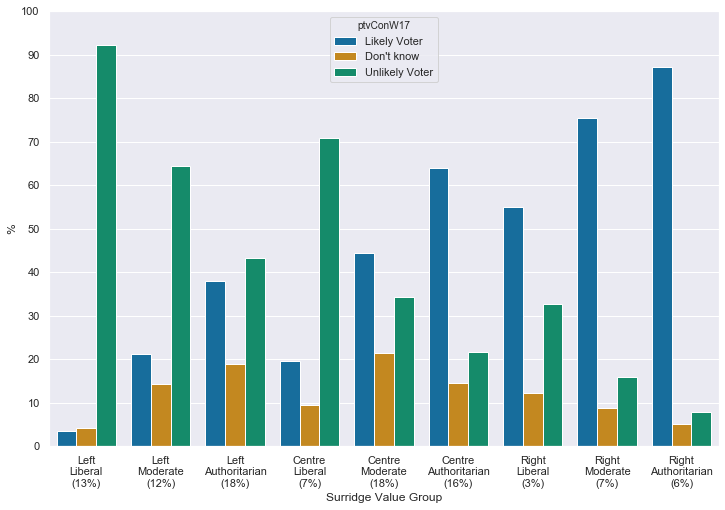

In [224]:
plt.figure(figsize=(12,8));

hue_name = "ptv"+shortname+"W17"
y_label = "%"

df_sns = weighted_count.groupby(value_group).apply(lambda x: 100*x/x.sum()).reset_index()
df_sns.columns = [value_group,hue_name,y_label]

sns.barplot(data=df_sns,
            x = value_group,hue=hue_name,y=y_label)

plt.xticks(range(9),["\n".join(x.split("-")) for x in df_temp[value_group].cat.categories]);
plt.ylim([0,100]);
plt.yticks(list(range(0,101,10)));

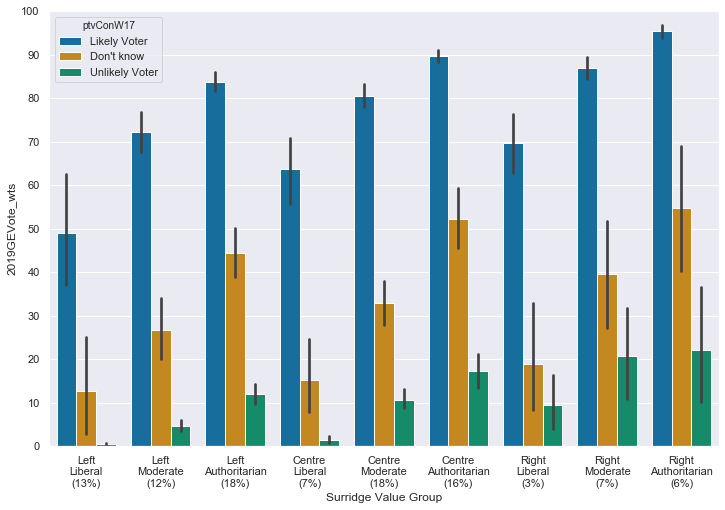

In [193]:
# %%time
mask = df_temp[value_group].notnull()
plt.figure(figsize=(12,8));

hue_name = "ptv"+shortname+"W17"
y_label = vote_name+"_wts"

# df_sns = df_temp[[value_group,vote_name+"_wts","likely"+shortname+"_wts"]][mask].set_index(value_group).stack().reset_index()
# df_sns.columns = [value_group,hue_name,"%"]
# replace_dict = {"likely"+shortname+"_wts":"Likely 2019 "+shortname+" Voter",vote_name+"_wts":"Actual 2019 "+shortname+" Voter"}
# df_sns[hue_name].replace(replace_dict,inplace=True)
# df_sns["%"] = df_sns["%"] *100
ax = sns.barplot(x=value_group, hue=hue_name,y=y_label,order = df_temp[value_group].cat.categories,
                 data=df_temp[mask],hue_order = lv_cat_order, estimator = weighted_mean, orient ='v');
plt.xticks(range(9),["\n".join(x.split("-")) for x in df_temp[value_group].cat.categories]);
plt.ylim([0,100]);
plt.yticks(list(range(0,101,10)));

In [181]:
df_temp.groupby(value_group)[vote_name+"_wts"].apply(lambda x: weighted_mean(x)).round(2)

Surridge Value Group
Left-Liberal-(13%)             2.35
Left-Moderate-(12%)           22.48
Left-Authoritarian-(18%)      49.35
Centre-Liberal-(7%)           16.01
Centre-Moderate-(18%)         50.77
Centre-Authoritarian-(16%)    73.05
Right-Liberal-(3%)            46.93
Right-Moderate-(7%)           76.48
Right-Authoritarian-(6%)      89.85
Name: 2019GEVote_wts, dtype: float64

In [182]:
df_temp.groupby(value_group)["likely"+shortname+"_wts"].apply(lambda x: weighted_mean(x)).round(2)

Surridge Value Group
Left-Liberal-(13%)             3.73
Left-Moderate-(12%)           21.39
Left-Authoritarian-(18%)      38.76
Centre-Liberal-(7%)           20.12
Centre-Moderate-(18%)         45.36
Centre-Authoritarian-(16%)    65.68
Right-Liberal-(3%)            55.45
Right-Moderate-(7%)           76.96
Right-Authoritarian-(6%)      86.58
Name: likelyCon_wts, dtype: float64

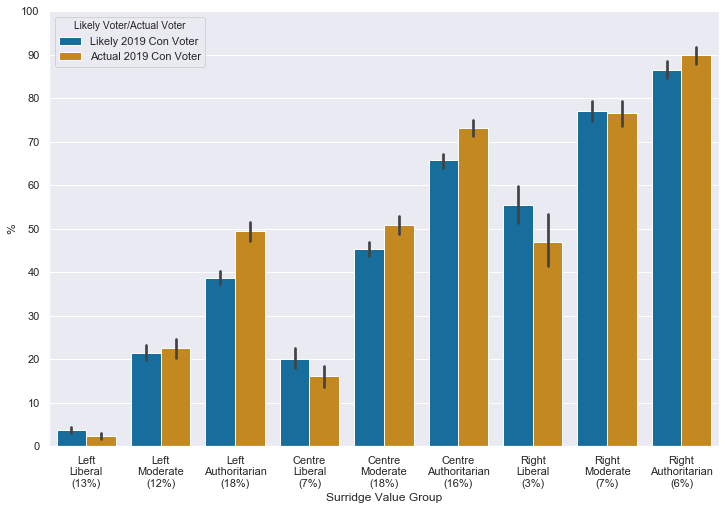

In [183]:
# %%time
mask = df_temp[value_group].notnull()
plt.figure(figsize=(12,8));

hue_name = "Likely Voter/Actual Voter"
y_label = "%"

df_sns = df_temp[[value_group,vote_name+"_wts","likely"+shortname+"_wts"]][mask].set_index(value_group).stack().reset_index()
df_sns.columns = [value_group,hue_name,"%"]
replace_dict = {"likely"+shortname+"_wts":"Likely 2019 "+shortname+" Voter",vote_name+"_wts":"Actual 2019 "+shortname+" Voter"}
df_sns[hue_name].replace(replace_dict,inplace=True)
# df_sns["%"] = df_sns["%"] *100
ax = sns.barplot(x=value_group, hue=hue_name,y=y_label,order = df_temp[value_group].cat.categories,
                 data=df_sns,hue_order = list(replace_dict.values()), estimator = weighted_mean, orient ='v');
plt.xticks(range(9),["\n".join(x.split("-")) for x in df_temp[value_group].cat.categories]);
plt.ylim([0,100]);
plt.yticks(list(range(0,101,10)));

In [151]:
longname = "Labour"
shortname = "Lab"
var_list = [value_group,"vote_wts","likely_wts",vote_name,"ptv"+shortname+"W17"]

vote_mask = df[vote_name].notnull() & df["vote_wts"].notnull()
likely_mask = df["ptv"+shortname+"W17"].notnull() & df["likely_wts"].notnull()

df_temp = df[var_list].copy()
df_temp[vote_name] = df_temp[vote_name]==longname
df_temp.loc[df[vote_name].isnull(),vote_name]=np.nan
df_temp[vote_name+"_wts"] = list(zip(df_temp[vote_name].astype('float32')*100,df_temp["vote_wts"]))
df_temp["likely"+shortname+"_wts"] = list(zip(df_temp["ptv"+shortname+"W17"].astype('float32')*100,df_temp["likely_wts"]))

df_temp.dropna().groupby([value_group,"ptv"+shortname+"W17"])[vote_name+"_wts"].apply(lambda x: weighted_mean(x)).round(2)

Surridge Value Group        ptvLabW17
Left-Liberal-(13%)          0.0          26.71
                            1.0          83.05
Left-Moderate-(12%)         0.0          20.13
                            1.0          77.11
Left-Authoritarian-(18%)    0.0           9.00
                            1.0          71.07
Centre-Liberal-(7%)         0.0          16.90
                            1.0          71.49
Centre-Moderate-(18%)       0.0           9.53
                            1.0          65.41
Centre-Authoritarian-(16%)  0.0           3.69
                            1.0          55.87
Right-Liberal-(3%)          0.0           6.21
                            1.0          36.52
Right-Moderate-(7%)         0.0           3.46
                            1.0          43.52
Right-Authoritarian-(6%)    0.0           1.51
                            1.0          23.06
Name: 2019GEVote_wts, dtype: float64

In [151]:
longname = "Labour"
shortname = "Lab"
var_list = ["value group","wts","2019GEVote","ptv"+shortname+"W17"]

vote_mask = df["2019GEVote"].notnull() & df["wts"].notnull()
likely_mask = df["ptv"+shortname+"W17"].notnull() & df["wts"].notnull()

df_temp = df[var_list].copy()
df_temp["2019GEVote"] = df_temp["2019GEVote"]==longname
df_temp["2019GEVote_wts"] = list(zip(df_temp["2019GEVote"],df_temp["wts"]))
df_temp["likely"+shortname+"_wts"] = list(zip(df_temp["ptv"+shortname+"W17"],df_temp["wts"]))

df_temp.dropna().groupby(["value group","ptv"+shortname+"W17"])["2019GEVote_wts"].apply(lambda x: weighted_mean(x)).round(2)

value group           ptvLabW17
Left-Liberal          0.0          0.22
                      1.0          0.77
Left-Moderate         0.0          0.15
                      1.0          0.69
Left-Authoritarian    0.0          0.07
                      1.0          0.59
Centre-Liberal        0.0          0.14
                      1.0          0.65
Centre-Moderate       0.0          0.08
                      1.0          0.53
Centre-Authoritarian  0.0          0.03
                      1.0          0.45
Right-Liberal         0.0          0.06
                      1.0          0.31
Right-Moderate        0.0          0.03
                      1.0          0.30
Right-Authoritarian   0.0          0.01
                      1.0          0.19
Name: 2019GEVote_wts, dtype: float64

In [152]:
df_temp[vote_mask].groupby("value group")["2019GEVote_wts"].apply(lambda x: weighted_mean(x)).round(2)

value group
Left-Liberal            0.70
Left-Moderate           0.50
Left-Authoritarian      0.29
Centre-Liberal          0.45
Centre-Moderate         0.25
Centre-Authoritarian    0.11
Right-Liberal           0.13
Right-Moderate          0.08
Right-Authoritarian     0.03
Name: 2019GEVote_wts, dtype: float64

In [153]:
df_temp[likely_mask].groupby("value group")["likely"+shortname+"_wts"].apply(lambda x: weighted_mean(x)).round(2)

value group
Left-Liberal            0.75
Left-Moderate           0.49
Left-Authoritarian      0.30
Centre-Liberal          0.51
Centre-Moderate         0.28
Centre-Authoritarian    0.15
Right-Liberal           0.22
Right-Moderate          0.11
Right-Authoritarian     0.05
Name: likelyLab_wts, dtype: float64

In [154]:
longname = "Liberal Democrat"
shortname = "LD"
var_list = ["value group","wts","2019GEVote","ptv"+shortname+"W17"]

vote_mask = df["2019GEVote"].notnull() & df["wts"].notnull()
likely_mask = df["ptv"+shortname+"W17"].notnull() & df["wts"].notnull()

df_temp = df[var_list].copy()
df_temp["2019GEVote"] = df_temp["2019GEVote"]==longname
df_temp["2019GEVote_wts"] = list(zip(df_temp["2019GEVote"],df_temp["wts"]))
df_temp["likely"+shortname+"_wts"] = list(zip(df_temp["ptv"+shortname+"W17"],df_temp["wts"]))

df_temp.dropna().groupby(["value group","ptv"+shortname+"W17"])["2019GEVote_wts"].apply(lambda x: weighted_mean(x)).round(2)

value group           ptvLDW17
Left-Liberal          0.0         0.03
                      1.0         0.22
Left-Moderate         0.0         0.02
                      1.0         0.24
Left-Authoritarian    0.0         0.01
                      1.0         0.21
Centre-Liberal        0.0         0.05
                      1.0         0.35
Centre-Moderate       0.0         0.03
                      1.0         0.29
Centre-Authoritarian  0.0         0.01
                      1.0         0.27
Right-Liberal         0.0         0.06
                      1.0         0.49
Right-Moderate        0.0         0.02
                      1.0         0.29
Right-Authoritarian   0.0         0.00
                      1.0         0.32
Name: 2019GEVote_wts, dtype: float64

In [155]:
df_temp[vote_mask].groupby("value group")["2019GEVote_wts"].apply(lambda x: weighted_mean(x)).round(2)

value group
Left-Liberal            0.14
Left-Moderate           0.13
Left-Authoritarian      0.07
Centre-Liberal          0.25
Centre-Moderate         0.14
Centre-Authoritarian    0.07
Right-Liberal           0.30
Right-Moderate          0.10
Right-Authoritarian     0.04
Name: 2019GEVote_wts, dtype: float64

In [156]:
df_temp[likely_mask].groupby("value group")["likely"+shortname+"_wts"].apply(lambda x: weighted_mean(x)).round(2)

value group
Left-Liberal            0.48
Left-Moderate           0.37
Left-Authoritarian      0.21
Centre-Liberal          0.59
Centre-Moderate         0.33
Centre-Authoritarian    0.17
Right-Liberal           0.48
Right-Moderate          0.25
Right-Authoritarian     0.10
Name: likelyLD_wts, dtype: float64

In [243]:
BES_Panel[list(search(BES_Panel,"ptv.*W17").index)].stack().value_counts().sort_index()

Very unlikely    89050
1                 7855
2                 8174
3                 7764
4                 6823
5                14383
6                 9106
7                10702
8                10099
9                 5593
Very likely      20823
Don't know       21296
dtype: int64

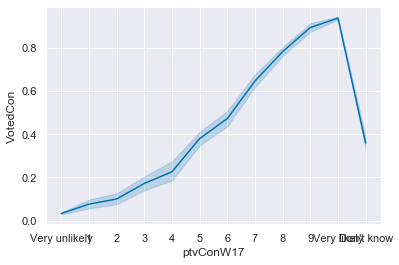

In [234]:
VotedCon = BES_Panel["pastvote_ge_2019W19"]=="Conservative"
VotedCon.loc[BES_Panel["pastvote_ge_2019W19"].isnull()]=np.nan


df_test_lvtv = pd.DataFrame()
df_test_lvtv["VotedCon"] = VotedCon
df_test_lvtv["ptvConW17"] = BES_Panel["ptvConW17"]

sns.lineplot(data=df_test_lvtv,x="ptvConW17",y="VotedCon")

In [256]:
mean_ptv = BES_Panel[list(search(BES_Panel,"ptv.*W17").index)].apply(lambda x: x.replace("Don't know",5).cat.codes.replace(-1,np.nan)).mean(axis=1)

In [257]:
var_ptv = BES_Panel[list(search(BES_Panel,"ptv.*W17").index)].apply(lambda x: x.replace("Don't know",5).cat.codes.replace(-1,np.nan)).var(axis=1)

In [247]:
# BES_Panel[list(search(BES_Panel,"ptv.*W17").index)].loc[98450 ]

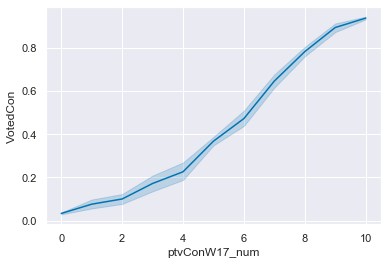

In [254]:
df_test_lvtv["ptvConW17_num"] = df_test_lvtv["ptvConW17"].cat.codes.replace(11,5).replace(-1,np.nan)
sns.lineplot(data=df_test_lvtv,x="ptvConW17_num",y="VotedCon");

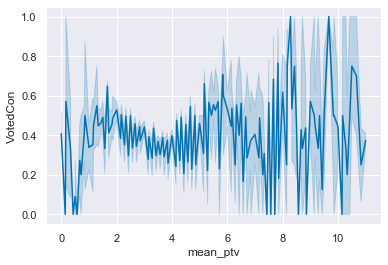

In [259]:
df_test_lvtv["mean_ptv"] = mean_ptv

sns.lineplot(data=df_test_lvtv,x="mean_ptv",y="VotedCon");

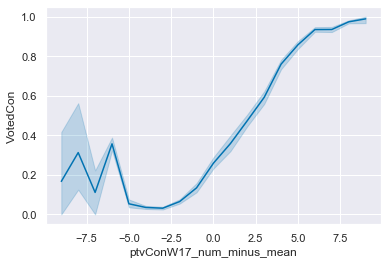

In [264]:
df_test_lvtv["mean_ptv"] = mean_ptv
df_test_lvtv["ptvConW17_num_minus_mean"]=(df_test_lvtv["ptvConW17_num"]-df_test_lvtv["mean_ptv"]).round()

sns.lineplot(data=df_test_lvtv,x="ptvConW17_num_minus_mean",y="VotedCon");

In [263]:
df_test_lvtv["ptvConW17_num_minus_mean"].round()

id
1        NaN
2        4.0
3        NaN
4        NaN
5        NaN
        ... 
98447    2.0
98448   -6.0
98449    0.0
98450    0.0
98451    0.0
Name: ptvConW17_num_minus_mean, Length: 97158, dtype: float64